# Tips Dataset Analysis

## Introduction
This is an analysis of a famous dataset known as the tips dataset. In one particular resturant, a waiter collected data on all the customers they served over a few months [1].

A server's tips can be greatly influenced by various different things, many of which our waiter recorded! So the big question we are going to try and address throughout this project is do any of these factors affect tip rate, and if so how much do they influnce tip rate?

In [697]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Adjust size to make plots a little bigger
plt.rcParams["figure.figsize"] = (15,7)

In [698]:
# Loading the tips dataset from seaborn
tips = sns.load_dataset("tips")

# get an inital look at the first pieces of data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


After an inital look at the dataset we can see the various columns. The type of data the tips dataset contains is as follows: 

- total_bill = the total bill, including tax, in US dollars
- tip = the tip in US dollars
- sex = the gender of the person paying bill (either male or female)
- smoker = indicates if the table was seated in the smoking area or not
- day = indicates the day on which the meal is served. Clearly the waiter only worked on Thursday, Friday, Saturday and Sundays.
- time = incidates what type of meal they were having either dinner or lunch
- size = how many people were at the table

Because we are looking at tipping, this is normally expressed as a percentage of the bill. Therefore to help with analysis I will be adding a tip rate column to my dataset. 

In [699]:
# Adding tiprate variable to dataset so we can see percentage
tips['tiprate'] = tips.tip/tips.total_bill * 100

So we have taken an inital look at our data just to get a sense of it, next we will check a few things to see if we can make any general observations about the data. I'm also going to have a look and see if there is any missing data that might disrupt our analysis.

In [700]:
tips.shape

(244, 8)

In [701]:
# Column names
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tiprate']

In [702]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
tiprate       244 non-null float64
dtypes: category(4), float64(3), int64(1)
memory usage: 9.1 KB


The list function allows us the see the column names, which will allow us to know wh

So we can see our data set has 244 rows and 8 columns (originally 7 but we added the 8th 'tiprate'). We also had a look at the column names, which match up with the descriptions I found earlier for our dataset. There are also no non-nulls meaning no missing data and all of the data types seem fine. So we can start analysing!

In [690]:
tips.describe()
# count tells us no missing data

,total_bill,tip,size,tiprate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [703]:
print("Total takings over 4 days is: $",tips.total_bill.sum())
print ("Total tips: ${:.2f}".format(tips.tip.sum()))

Total takings over 4 days is: $ 4827.77
Total tips: $731.58


So from the describe() we can see that the count matches the shape we looked at earlier, so no variables seem to be missing in these columns. 

The average tiprate for this resturant is about 16%. The average bill is about \\$20 dollars, with the lowest bill being \\$3.07 and the highest \\$50.81. So it doesn't seem to be a particulary expensive resturant and the tipping is fairly standard if not a little low (assuming an average tipping rate of 15 - 20% in USA for standard service)

In [642]:
bill = tips.sort_values("total_bill", ascending = False)
bill.head(20)
# biggest spenders seem to be male and at dinner and weekend

,total_bill,tip,sex,smoker,day,time,size,tiprate
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
182,45.35,3.50,Male,Yes,Sun,Dinner,3,7.717751
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341
197,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237
142,41.19,5.00,Male,No,Thur,Lunch,5,12.138869
184,40.55,3.00,Male,Yes,Sun,Dinner,2,7.398274
95,40.17,4.73,Male,Yes,Fri,Dinner,4,11.774956


In [643]:
tiptotal = tips.sort_values("tiprate", ascending = False)
tiptotal.head(20)
# also biggest tipper seem to be male and at dinner and the weekend

,total_bill,tip,sex,smoker,day,time,size,tiprate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250


In [644]:
tips.sex
tips["sex"].value_counts()
# more males than females

Male      157
Female     87
Name: sex, dtype: int64

In [645]:
tips["size"].nunique()
# 6 sizes of tables

6

In [646]:
tips.loc[tips["smoker"]=="Yes"].mean()
# smokers tip similar to mean tip of $3 across whole set

total_bill    20.756344
tip            3.008710
size           2.408602
tiprate       16.319604
dtype: float64

In [647]:
tips.pivot(columns='smoker', values='tip').describe()
# smokers didn't tip too much more

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


In [648]:
tips.loc[tips["sex"]=="Male"].mean()
#[2]

total_bill    20.744076
tip            3.089618
size           2.630573
tiprate       15.765055
dtype: float64

In [649]:
tips.pivot(columns='sex', values='tip').describe()
# men do infact seem to tip more

sex,Male,Female
count,157.000000,87.000000
mean,3.089618,2.833448
std,1.489102,1.159495
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.750000
75%,3.760000,3.500000
max,10.000000,6.500000


In [650]:
tips.pivot(columns='day', values='tip').describe()
# average tip highest on sunday

day,Thur,Fri,Sat,Sun
count,62.000000,19.000000,87.000000,76.000000
mean,2.771452,2.734737,2.993103,3.255132
std,1.240223,1.019577,1.631014,1.234880
min,1.250000,1.000000,1.000000,1.010000
25%,2.000000,1.960000,2.000000,2.037500
50%,2.305000,3.000000,2.750000,3.150000
75%,3.362500,3.365000,3.370000,4.000000
max,6.700000,4.730000,10.000000,6.500000


In [651]:
tips.pivot(columns='time', values='tip').describe()

time,Lunch,Dinner
count,68.000000,176.000000
mean,2.728088,3.102670
std,1.205345,1.436243
min,1.250000,1.000000
25%,2.000000,2.000000
50%,2.250000,3.000000
75%,3.287500,3.687500
max,6.700000,10.000000


In [652]:
# Looking at the average bill/tip/tiprate
# .unstack() is used to convert the results into a more readable format

print(tips.groupby(["day","time"]).mean().fillna(0).unstack())

     total_bill                  tip                size              tiprate  \
time      Lunch     Dinner     Lunch    Dinner     Lunch    Dinner      Lunch   
day                                                                             
Thur  17.664754  18.780000  2.767705  3.000000  2.459016  2.000000  16.130074   
Fri   12.845714  19.663333  2.382857  2.940000  2.000000  2.166667  18.876489   
Sat    0.000000  20.441379  0.000000  2.993103  0.000000  2.517241   0.000000   
Sun    0.000000  21.410000  0.000000  3.255132  0.000000  2.842105   0.000000   

                 
time     Dinner  
day              
Thur  15.974441  
Fri   15.891611  
Sat   15.315172  
Sun   16.689729  

 
 
 Total takings over 4 days is :$ 4827.77


In [653]:
#How much did the smokers and non smokers pay towards tips.  .fillna(0) is used to replaced NaN as no one had eaten.
# .unstack() is used to convert the results into a more readable format

print(tips.groupby(["sex", "smoker", "day", "time"])["tip"].sum().unstack().fillna(0))

time                Lunch  Dinner
sex    smoker day                
Male   Yes    Thur  30.58    0.00
              Fri    5.70   16.23
              Sat    0.00   77.74
              Sun    0.00   52.82
       No     Thur  58.83    0.00
              Fri    0.00    5.00
              Sat    0.00  104.21
              Sun    0.00  133.96
Female Yes    Thur  20.93    0.00
              Fri    7.98   10.80
              Sat    0.00   43.03
              Sun    0.00   14.00
       No     Thur  58.49    3.00
              Fri    3.00    3.25
              Sat    0.00   35.42
              Sun    0.00   46.61

 
 Total tips : $731.58

 Average tip rate : 16.08%


In [654]:
# average tiprate by different variables
print(tips.groupby(["sex", "smoker", "day", "time", "size"])["tiprate"].mean().unstack().fillna(0).round(2))

size                           1      2      3      4      5      6
sex    smoker day  time                                            
Male   Yes    Thur Lunch    0.00  15.44  21.38  19.48   0.00   0.00
              Fri  Lunch   22.38  14.93   0.00   0.00   0.00   0.00
                   Dinner   0.00  12.94   0.00  11.77   0.00   0.00
              Sat  Dinner   0.00  14.24  14.57  12.89  10.66   0.00
              Sun  Dinner   0.00  19.07  12.52  19.34   6.57   0.00
       No     Thur Lunch    0.00  17.22   9.55  14.71  12.14  19.53
              Fri  Dinner   0.00  13.80   0.00   0.00   0.00   0.00
              Sat  Dinner   0.00  16.99  15.21  15.54   0.00   0.00
              Sun  Dinner   0.00  16.57  14.75  14.85  24.17  10.38
Female Yes    Thur Lunch    0.00  16.59  19.61  11.60   0.00   0.00
              Fri  Lunch    0.00  20.37   0.00   0.00   0.00   0.00
                   Dinner   0.00  21.32   0.00   0.00   0.00   0.00
              Sat  Dinner  32.57  15.83  14.36  

In [655]:
# Groups by the sex column to view the total tips and size of party
print(tips.groupby("sex").sum())

print("\n\nCount the amount of smokers and non smokers that gave a tip :","\n",tips.groupby(by = "smoker")["tip"].count())
print("\n\nTotal the amount of tips that smokers and non smokers gave :","\n",tips.groupby(by = "smoker")["tip"].sum())

        total_bill     tip  size      tiprate
sex                                          
Male       3256.82  485.07   413  2475.113588
Female     1570.95  246.51   214  1448.469406


Count the amount of smokers and non smokers that gave a tip : 
 smoker
Yes     93
No     151
Name: tip, dtype: int64


Total the amount of tips that smokers and non smokers gave : 
 smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64


# Visualising Data

## Looking at tips in general histograms

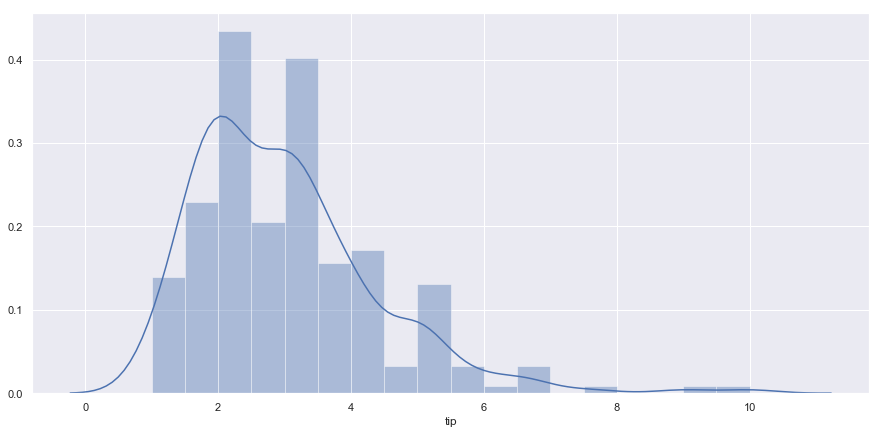

In [656]:
sns.distplot(tips["tip"])

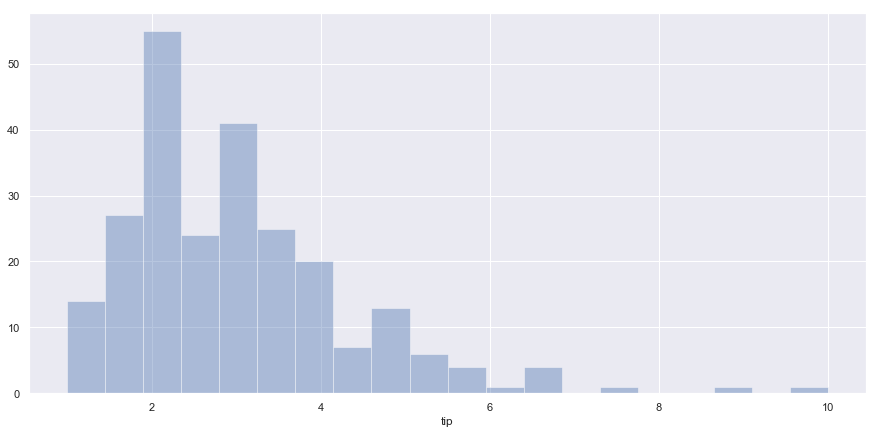

In [657]:
sns.distplot(tips['tip'], kde=False, bins=20);
# data is skewed more small tips than larger tips
# serveral outliers in big tips here also

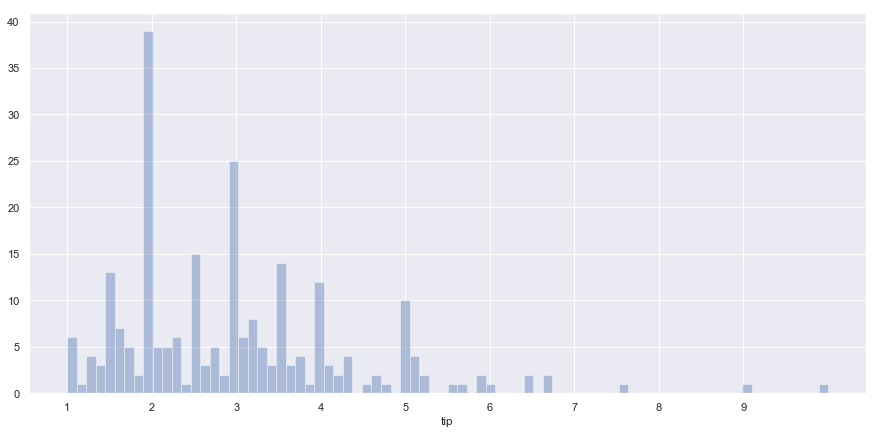

In [658]:
sns.distplot(tips['tip'], kde=False, bins=80);
plt.xticks(np.arange(1, 10, step=1.0))
plt.show()
# most tips between 2 and 4...no tips lower than 1 which we saw above with min
# assuming there is a realationship bewtween total bill and tips with the bill 
# being between 15 and 60 the resturant must not be too upscale
# peaks at 1,2,3,4,5 people are rounding tips..card vs cash?

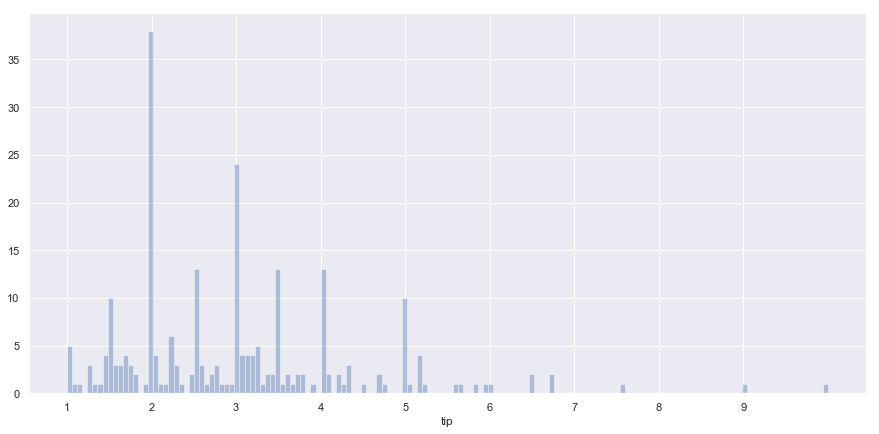

In [659]:
sns.distplot(tips['tip'], kde=False, bins=150);
plt.xticks(np.arange(1, 10, step=1.0))
plt.show()
# really clear peaks also at 1.5, 2.5, 3.5
# people also round to 50c

## Tip VS Total Bill

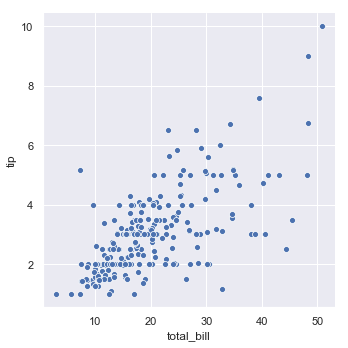

In [660]:
sns.relplot(x="total_bill", y="tip", data=tips);

more seem to pay lower tips and lower total bills, and less people tend tor spend alot here. skewed as the tips alone were.
lines of points visible at the tips level of 2,3,4 also at but not as easy to see as in histogram 1.50,2.50,3.50
amounts. tells us same again people tend to round to 1 or 50c

general linear relationship between tip and total bill. this is what we would expect. alot more people seem to be under the line than over so probably tip under the 15% or so?

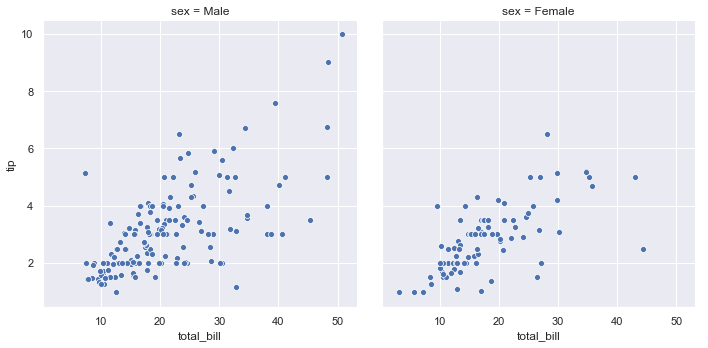

In [661]:
sns.relplot(x="total_bill", y="tip", col="sex", data=tips);

seems to be a few bigger bills paid by males. bigger tips are being paid by males. slope looks a little higher for males. having not looked at size yet we don't know much about context...maybe more tables of 2 might mean men tipping higher on dates or maybe a business lunch?


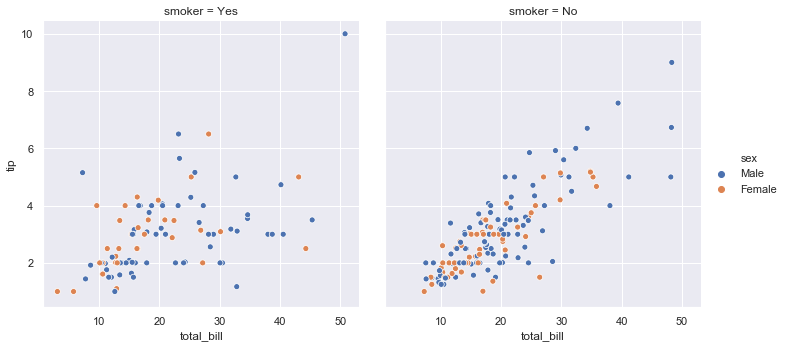

In [662]:
sns.relplot(x="total_bill", y="tip", hue="sex", col="smoker", data=tips);

smokers seem to be very erratic with lots of variablity. seems to be no consistent relationship.


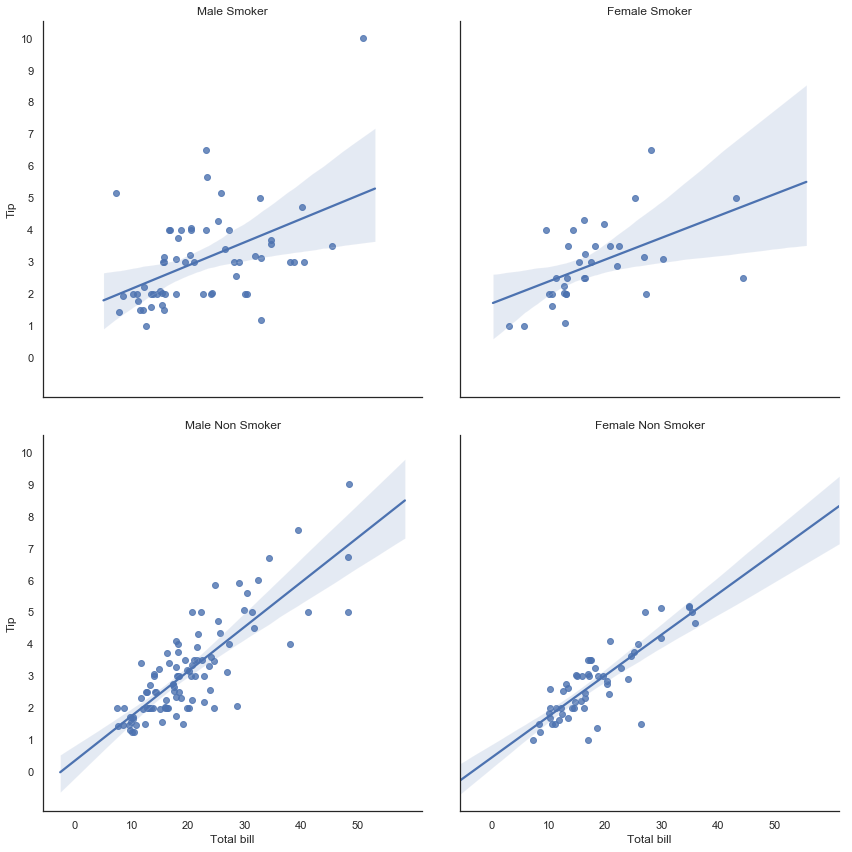

In [663]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="smoker", col="sex", height=6)
g.map(sns.regplot, "total_bill", "tip");
g.set_axis_labels("Total bill", "Tip");
axes = g.axes.flatten()
plt.xticks(np.arange(0, 51, step=10.0))
plt.yticks(np.arange(0, 11, step=1.0))
axes[0].set_title("Male Smoker")
axes[1].set_title("Female Smoker")
axes[2].set_title("Male Non Smoker")
axes[3].set_title("Female Non Smoker")
g.fig.subplots_adjust(wspace=.1, hspace=.1);
#[3]

female non smokers seem to be consistent tippers looking at the clusters of their tips. 

# Histograms of tiprate data
all data looks skewed but its mainly because of 2 large tips

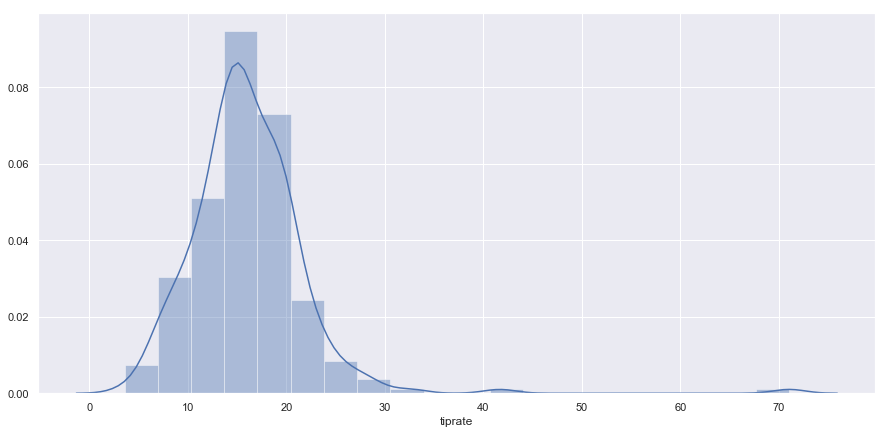

In [664]:
# all data
sns.distplot(tips["tiprate"], bins = 20)

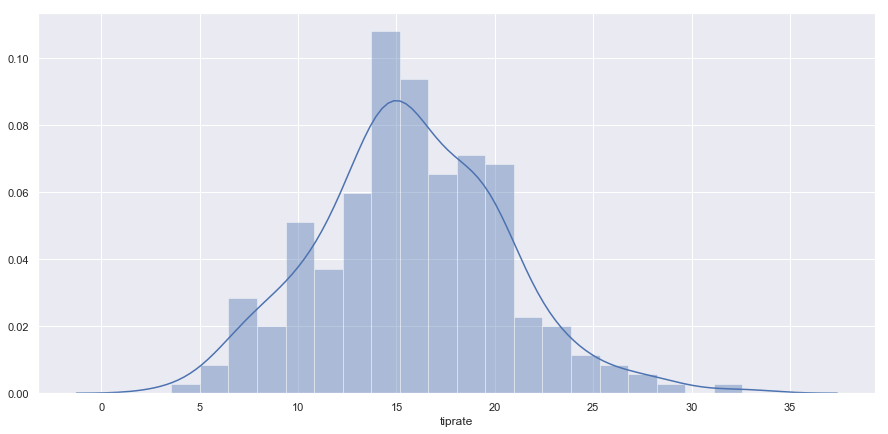

In [665]:
# all tips less than 35%
tiprate35 = tips.tiprate[tips['tiprate']<=35.0]
sns.distplot(tiprate35, bins=20)

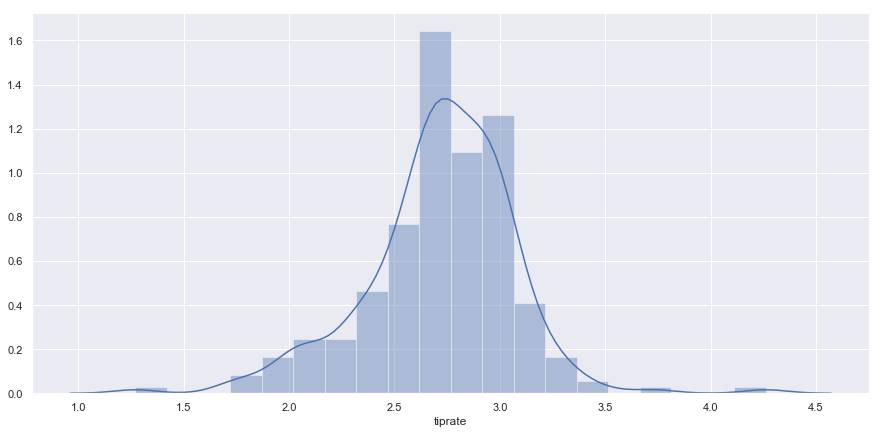

In [666]:
# log of tiprate
logtiprate = np.log(tips.tiprate)
sns.distplot(logtiprate, bins = 20)

## Sex vs Day of the week

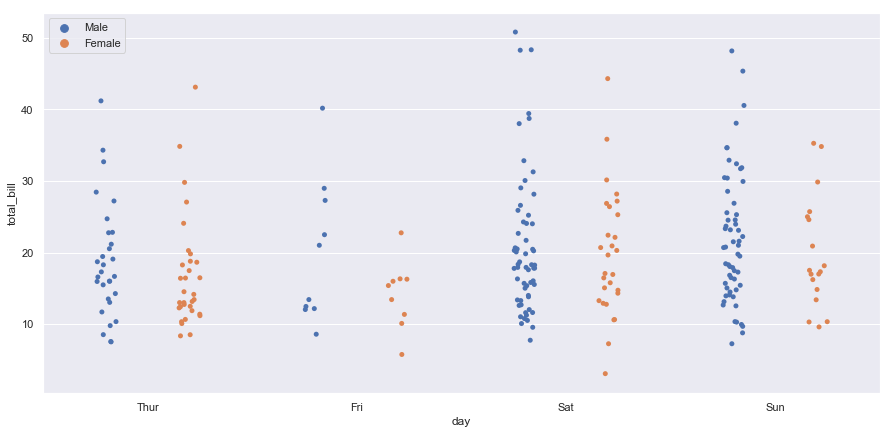

In [667]:
ax = sns.stripplot( x="day", y="total_bill", dodge=True, hue="sex", data=tips)
plt.legend(loc='upper left')

Here we see the distributions of the sex of the bill payers on the different days of the week. Thurs and fri seem equal enough. sat and sun seem to have more males than females paying the bills 

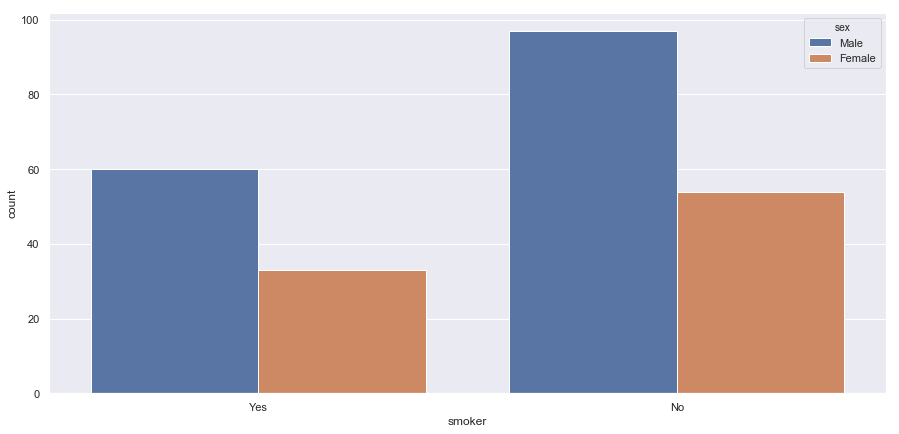

In [668]:
sns.countplot(x="smoker",data=tips,hue="sex")

Above there is a count plot looking at Smoking Party and Sex of the Bill Payer. There doesn't seem to be any relationship between Smoking and Sex as the rectangles are roughly equal and we know from above there were more male bill payers than female in general.

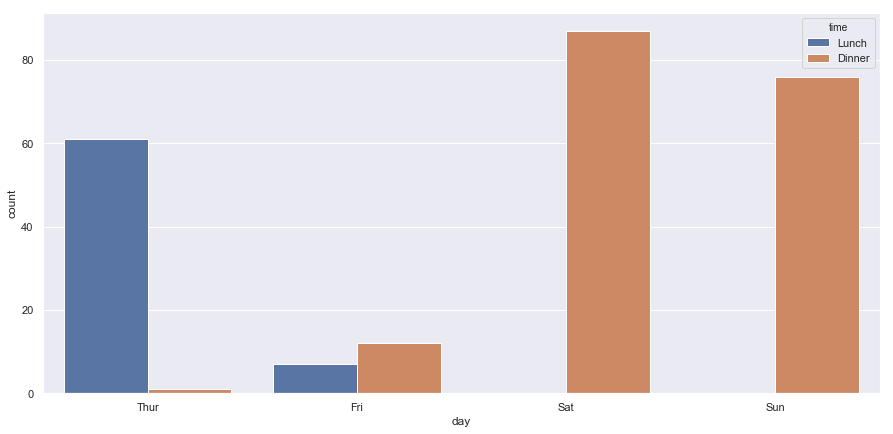

In [669]:
sns.countplot(x="day",data=tips,hue="time")

this is looking at day vs mealtime. no measurements were taken for lunch time on sat or sun. thurs has very few dinner time measurements and friday has similar numbers of both lunch and dinner time readings.

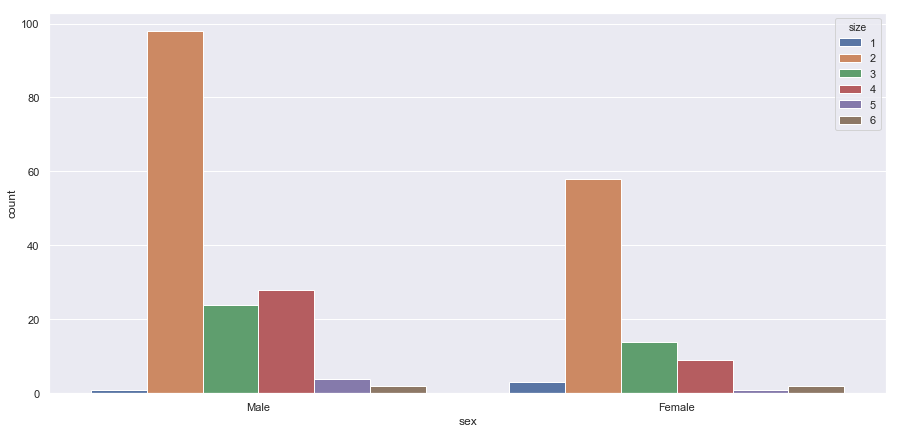

In [670]:
sns.countplot(x="sex",data=tips,hue="size")

as above stats show mostly parties of 2 with males paying for more of these bills that females. tables of 1, 5 and 6 not too frequent.

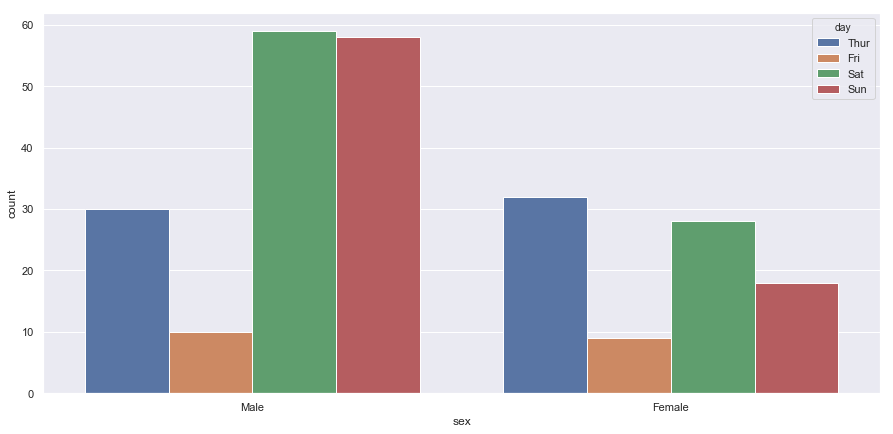

In [671]:
sns.countplot(x="sex",data=tips,hue="day")

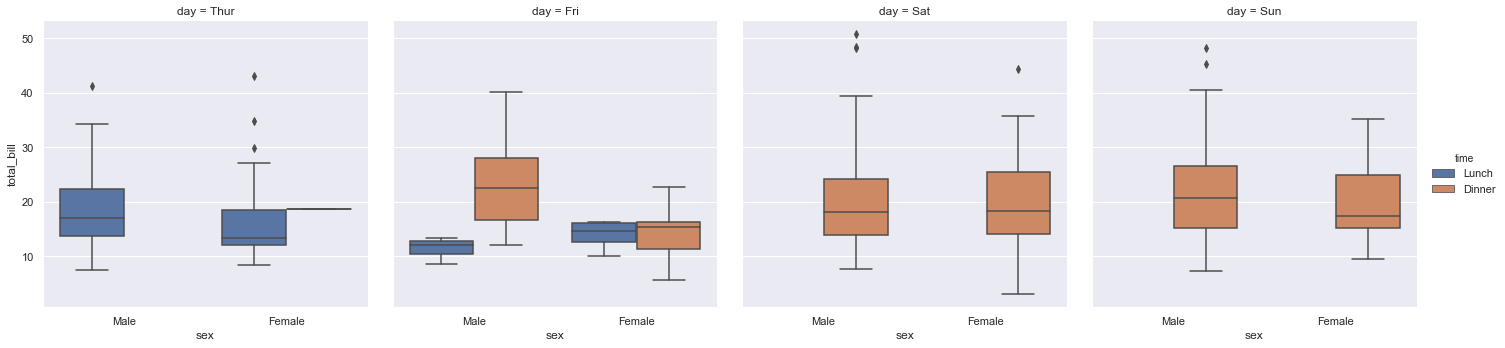

In [672]:
sns.catplot(x="sex", y="total_bill",hue="time", col="day",data=tips, kind="box")

males seem to be more likely to pay at the weekend

Using this plot it’s so simple to find changes in total_bill according to days. The total_bill is rising for male’s as the weekend arises while it decreases on Friday for females and jumps on Saturday and remains mostly constant on Sunday.

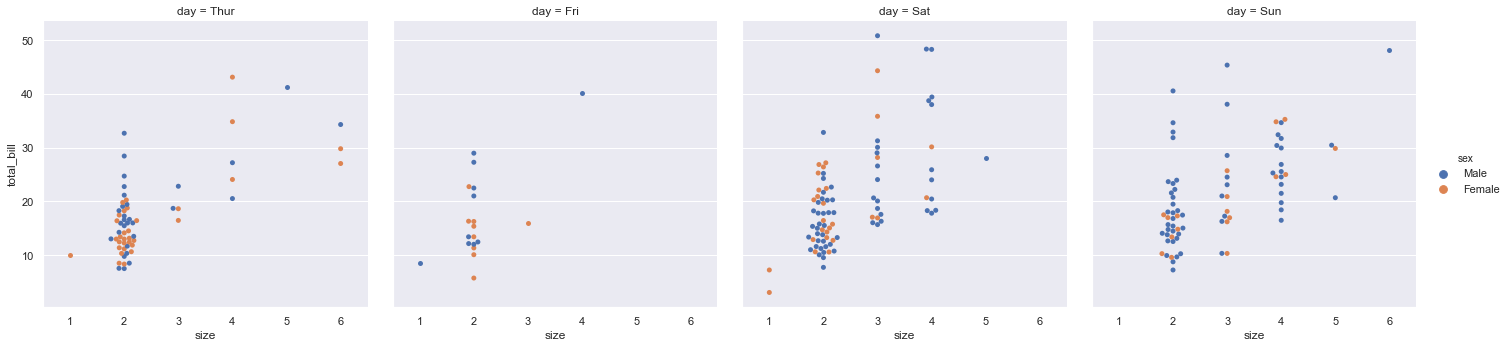

In [673]:
sns.catplot(x="size", y="total_bill",hue="sex", col="day",data=tips, kind="swarm")

Here we are looking at a plot with size of the party, day of the week and the sex of the bill payer. Here we see again (as seen above) that it is mostly tables of 2 with bigger tables of 3 and 4 more likely on saturday and sun. In general this seems to follow the trend of males getting the bill more often, with it seeming more likely on saturday and sunday (again maybe popular for dates?). Parties of 1 seems to depend on day of the week and don't seem too common - males on firday, mostly females on thurs and sat and no one dined alone on sun. Looking at tables of 3, thursday had roughly equal male and female bill payers, friday mostly female, saturday more males and sunday looks roughly equal. Tables of 4 equal enough on thursday, but more males friday to sunday. Tables of 5 and 6 are not that common in this resturant.


## Regression

In [674]:
pd.get_dummies(tips)
tips = pd.concat([pd.get_dummies(tips[['sex', 'smoker','day','time']]), tips[['total_bill', 'tip', 'size', 'tiprate']]], axis=1)


In [675]:
tips.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,total_bill,tip,size,tiprate
0,0,1,0,1,0,0,0,1,0,1,16.99,1.01,2,5.944673
1,1,0,0,1,0,0,0,1,0,1,10.34,1.66,3,16.054159
2,1,0,0,1,0,0,0,1,0,1,21.01,3.50,3,16.658734
3,1,0,0,1,0,0,0,1,0,1,23.68,3.31,2,13.978041
4,0,1,0,1,0,0,0,1,0,1,24.59,3.61,4,14.680765


In [676]:
# omit Sun
from statsmodels.formula.api import ols
model = ols("tiprate ~ C(sex_Male) + C(smoker_Yes) + C(day_Thur) + C(day_Fri) + C(day_Sat) + C(time_Lunch) + size", data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tiprate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.479
Date:                Tue, 22 Oct 2019   Prob (F-statistic):              0.175
Time:                        20:49:49   Log-Likelihood:                -781.99
No. Observations:                 244   AIC:                             1580.
Df Residuals:                     236   BIC:                             1608.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9862      1.528     13.081      0.000      16.976      22.996
C(sex_Male)[T.1]      -0.8543      0.835     -1.023      0.307      -2.499       0.790
C(smoker_Yes)[T.1]     0.3637      0.850      0.428      0.669      -1.310       2.038
C(day_Thur)[T.1]      -3.4848      2.781     -1.253      0.211      -8.964       1.995
C(day_Fri)[T.1]       -1.6672      1.902     -0.876      0.382      -5.415       2.080
C(day_Sat)[T.1]       -1.8445      0.982     -1.878      0.062      -3.780       0.091
C(time_Lunch)[T.1]     2.3371      2.612      0.895      0.372      -2.808       7.483
size                  -0.9625      0.422     -2.282      0.023      -1.793      -0.132
==============================================================================
Omnibus:                      214.408   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7088.439
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      28.623   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [677]:
# removing outlier tips
tips.tiprate[tips['tiprate']>35.0]

172    71.034483
178    41.666667
Name: tiprate, dtype: float64

In [678]:
tips = tips.drop([tips.index[172] , tips.index[178]])

In [679]:
X = tips['size']
Y = tips['tiprate']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# model becomes tiprate 18.4 - 0.91 x size (coef column)
# tiprate drops from 18% by 1% for each extra person at the table

                            OLS Regression Results                            
Dep. Variable:                tiprate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.034
Date:                Tue, 22 Oct 2019   Prob (F-statistic):             0.0258
Time:                        20:49:49   Log-Likelihood:                -715.75
No. Observations:                 242   AIC:                             1435.
Df Residuals:                     240   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5727      0.867     20.262      0.0

In [680]:
X = tips['size']
Y = tips['tiprate']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# model becomes tiprate 17.5 - 0.7 x size

                            OLS Regression Results                            
Dep. Variable:                tiprate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.034
Date:                Tue, 22 Oct 2019   Prob (F-statistic):             0.0258
Time:                        20:49:50   Log-Likelihood:                -715.75
No. Observations:                 242   AIC:                             1435.
Df Residuals:                     240   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5727      0.867     20.262      0.0

In [681]:
from statsmodels.formula.api import ols
model = ols("np.log(tiprate) ~ C(sex_Male) + C(smoker_Yes) + C(day_Thur) + C(day_Fri) + C(day_Sat) + C(time_Lunch) + size", data=tips)
results = model.fit()
results.summary()
# log is pretty much the same so we'll stick with untransformed~

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tiprate)   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.972
Date:                Tue, 22 Oct 2019   Prob (F-statistic):             0.0597
Time:                        20:49:50   Log-Likelihood:                -68.228
No. Observations:                 242   AIC:                             152.5
Df Residuals:                     234   BIC:                             180.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8795      0.083     34.720      0.000       2.716       3.043
C(sex_Male)[T.1]      -0.0475      0.045     -1.051      0.294      -0.136       0.042
C(smoker_Yes)[T.1]    -0.0940      0.046     -2.035      0.043      -0.185      -0.003
C(day_Thur)[T.1]      -0.1236      0.150     -0.826      0.410      -0.419       0.171
C(day_Fri)[T.1]        0.0519      0.103      0.504      0.615      -0.151       0.255
C(day_Sat)[T.1]       -0.0255      0.054     -0.476      0.635      -0.131       0.080
C(time_Lunch)[T.1]     0.1535      0.140      1.093      0.276      -0.123       0.430
size                  -0.0440      0.023     -1.934      0.054      -0.089       0.001
==============================================================================
Omnibus:                       27.698   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.162
Skew:                          -0.714   Prob(JB):                     1.90e-09
Kurtosis:                       4.395   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

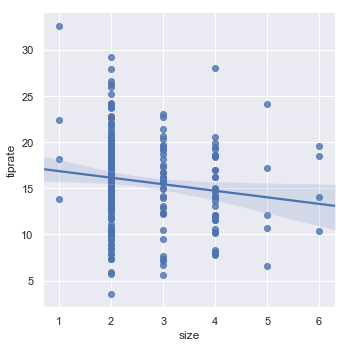

In [682]:
sns.lmplot(x="size", y="tiprate" ,data=tips)

Sex and smoking or not?

In [683]:
model = ols("tiprate ~ C(sex_Male)*C(smoker_Yes) + size + C(sex_Male) + C(smoker_Yes)", data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tiprate   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.833
Date:                Tue, 22 Oct 2019   Prob (F-statistic):            0.00488
Time:                        20:49:51   Log-Likelihood:                -710.68
No. Observations:                 242   AIC:                             1431.
Df Residuals:                     237   BIC:                             1449.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              17.4763      1.030     16.959      0.000      15.446      19.506
C(sex_Male)[T.1]                        0.4565      0.784      0.583      0.561      -1.087       2.000
C(smoker_Yes)[T.1]                      1.5543      1.034      1.503      0.134      -0.483       3.591
C(sex_Male)[T.1]:C(smoker_Yes)[T.1]    -3.4287      1.280     -2.678      0.008      -5.951      -0.907
size                                   -0.6882      0.315     -2.182      0.030      -1.309      -0.067
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.422
Skew:                           0.278   Prob(JB):                        0.110
Kurtosis:                       3.359   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 0.18 tiprate
- minus 0.68% tip for each additional party memeber
- minus 0.45% for a female paying

- smoking party -1.55% in tip
- sex times smoker - if a female pays for a smoking bill +3% in tip. Roughly matches plots above!

coef are significantly different from 0, the model still doesn't really explain the enough about the variation in tiprate